# Neural ODE example notebook

Load packages/functionality from nODE and training

In [1]:
import torch
import numpy as np
from models.training import easyTrainer, weights_to_dataset
from models.nODE import nODE, make_nODE_from_parameters
import matplotlib.pyplot as plt
device = 'cpu'#torch.device('cuda' if torch.cuda.is_available() else 'cpu')''

Generate toggle switch dataset based on parameters

Plot phase portrait based on current nODE parameters..


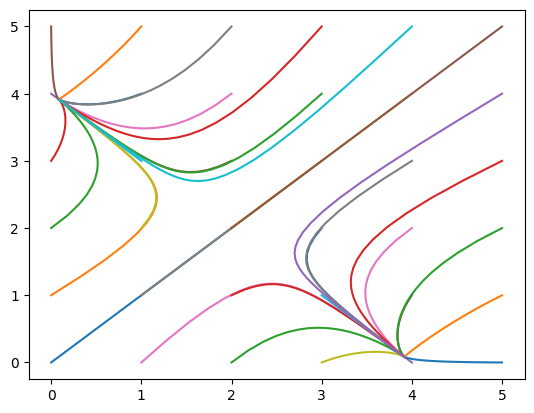

In [2]:
ODE_dim = 2
Gamma = np.array([-1., -1.])
integration_time = 1
Win = np.array([[0, -1.], [-1., 0]])
Wout = np.array([[2., 0], [0, 2.]])
bin = np.array([[2.], [2.]])
bout = np.array([[2.], [2.]])

train_data, test_data = weights_to_dataset(integration_time, Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout, batch_size = 10)

true_model = make_nODE_from_parameters(Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout)

true_model.phase_portrait(gridpoints=5, time_interval=[0.,10.])

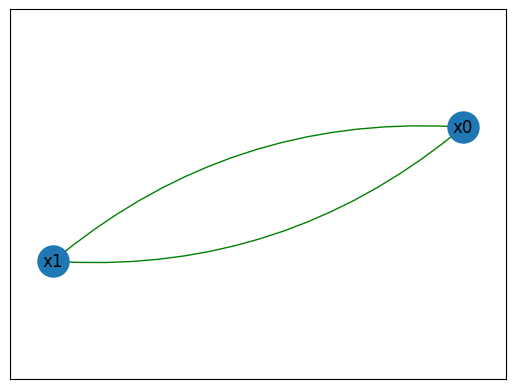

Gx + w1tanh(w2x(t)+b2)+b1    over the interval [0, 1]
G = [-0.67103565 -0.41938177], W1 = [[ 0.76212996 -0.20058034]
 [ 1.151177    0.12244777]],        b1 = [-1.0505632  -0.78042954]

W2= [[ 0.9046749  1.4385717]
 [-0.3287513 -1.1356192]],        b2 = [ 1.6198466 -0.6593481]




In [3]:
node = nODE(ODE_dim, architecture='both', time_interval=[0, integration_time])

optimizer_node = torch.optim.Adam(node.parameters(), lr=1e-1)

trainer = easyTrainer(node, optimizer_node, device, verbose=0)

trainer.train(train_data, 400)

node.plot()
print(node)

Plot phase portrait based on current nODE parameters..


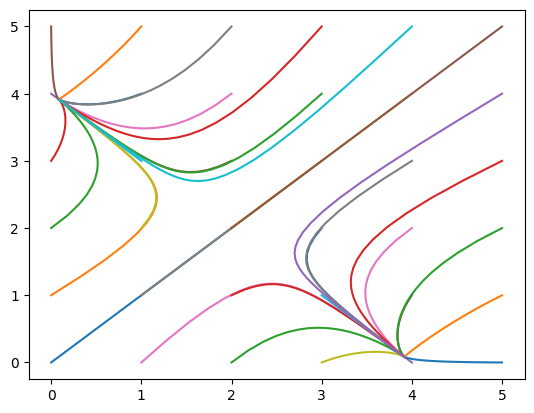

In [4]:
true_model.phase_portrait(gridpoints=5, time_interval=[0.,10.])

Generate repressilator dataset based on parameters

Plot phase portrait based on current nODE parameters..


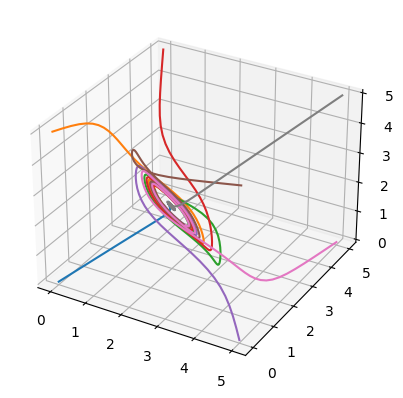

In [5]:
ODE_dim = 3
Gamma = np.array([-1., -1., -1.])
integration_time = 1
Win = np.array([[0, 0, -1.], [-1., 0, 0], [0,-1.,0]])
Wout = np.array([[2., 0, 0], [0, 2., 0], [0,0,2.]])
bin = np.array([[2.], [2.], [2.]])
bout = np.array([[2.2], [2.], [2.]])

train_data, test_data = weights_to_dataset(integration_time, Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout, batch_size = 200)

true_model = make_nODE_from_parameters(Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout)

true_model.phase_portrait(dim3=2, gridpoints=1, time_interval=[0.,10.])

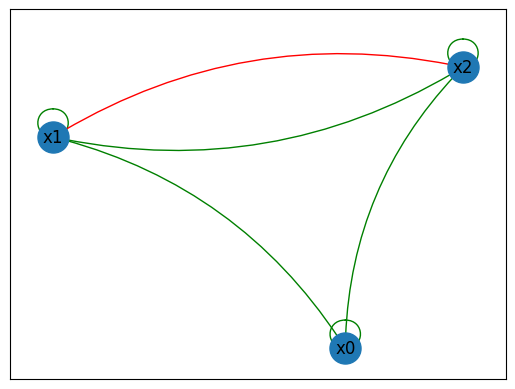

Gx + w1tanh(w2x(t)+b2)+b1    over the interval [0, 1]
G = [-2.003582  -1.7897733 -1.2038763], W1 = [[ 3.287978   -1.0383452   2.1124234 ]
 [-2.691825   -1.4772527   1.4614451 ]
 [ 0.41717178  2.1657171   1.6493541 ]],        b1 = [1.8093902 1.9332526 0.7904815]

W2= [[ 0.49652973 -0.11772397 -0.25933427]
 [ 0.04870688 -0.6763906   0.3609152 ]
 [ 0.9200864   0.62479246  0.6298725 ]],        b2 = [-0.14490128  0.33639827  0.76955384]




In [6]:
node = nODE(ODE_dim, architecture='both', time_interval=[0, integration_time])

optimizer_node = torch.optim.Adam(node.parameters(), lr=1e-1)

trainer = easyTrainer(node, optimizer_node, device, verbose=0)

trainer.train(train_data, 400)

node.plot()
print(node)

Plot phase portrait based on current nODE parameters..


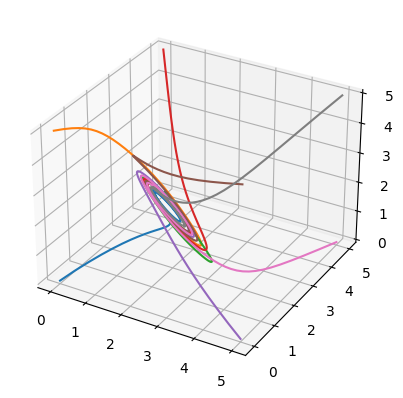

In [7]:
node.phase_portrait(dim3=2, gridpoints=1, time_interval=[0.,10.])